In [1]:
# load model
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dot, Input, Dense, Reshape, LSTM
from tensorflow.keras.layers import Embedding, Multiply, Subtract
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Lambda

from string import punctuation
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import skipgrams
import itertools

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

/scratch/danaderp/.conda/envs/drmccr_conda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


In [18]:
from sklearn.metrics import average_precision_score,precision_recall_curve
from sklearn.utils.fixes import signature

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
path = 'results[10000]/embeds20-improvement-99-0.51.hdf5'
criticality_network = load_model(path) #<----- The Model

In [9]:
df_history_training = pd.read_csv('history_training.csv')
np_target_test_y = np.load('target_test_y.npy')
np_corpora_test_x = np.load('corpora_test_x.npy')

In [4]:
df_history_training.head()

,accuracy,loss,val_accuracy,val_loss
0,0.663175,0.622140,0.609560,0.613514
1,0.722267,0.534145,0.710526,0.543627
2,0.741338,0.510209,0.552095,0.674813
3,0.753559,0.493609,0.679914,0.545141
4,0.758528,0.484317,0.703008,0.557063


In [27]:
for elem in np_target_test_y:
    print(elem[0])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [11]:
np_corpora_test_x

array([[[[-5.79816878e-01],
         [-3.53683680e-01],
         [-1.73988834e-01],
         ...,
         [ 3.53848010e-01],
         [ 1.33250028e-01],
         [ 2.10730362e+00]],

        [[-7.13148057e-01],
         [ 4.81235713e-01],
         [ 2.98178703e-01],
         ...,
         [ 3.27374130e-01],
         [ 1.42806217e-01],
         [-1.77221671e-01]],

        [[-1.75579429e+00],
         [ 2.10734916e+00],
         [-1.97159004e+00],
         ...,
         [ 3.78753304e-01],
         [-1.84604097e-02],
         [ 8.91723061e+00]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [6]:
%matplotlib inline

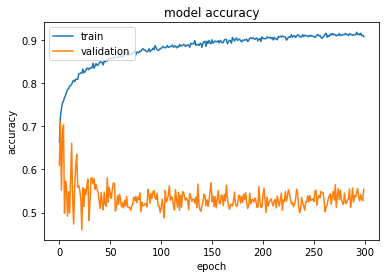

In [7]:
####Ploting Validation (overfitting assessment)
# summarize history for accuracy
plt.plot(df_history_training['accuracy'])
plt.plot(df_history_training['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

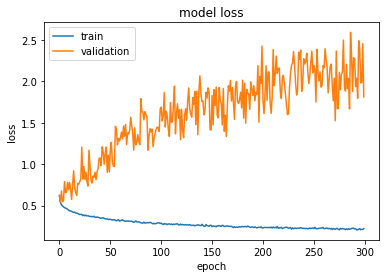

In [8]:
plt.plot(df_history_training['loss'])
plt.plot(df_history_training['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
#Making Evaluations
score = criticality_network.evaluate(np_corpora_test_x, np_target_test_y, verbose=1)

515/515 [==============================] - 3s 6ms/sample - loss: 0.3040 - accuracy: 0.8466


In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30395690373063666
Test accuracy: 0.84660196


In [15]:
#Making Predictions
history_predict = criticality_network.predict(x=np_corpora_test_x)
history_predict

array([[9.9720985e-01, 2.7901731e-03],
       [9.9999738e-01, 2.5636232e-06],
       [9.9996185e-01, 3.8168208e-05],
       ...,
       [9.3191576e-01, 6.8084195e-02],
       [9.9999368e-01, 6.3166767e-06],
       [9.9189901e-01, 8.1009483e-03]], dtype=float32)

In [16]:
inferred_data = pd.DataFrame(history_predict,columns=list('AB'))
target_data = pd.DataFrame(np_target_test_y,columns=list('LN'))
data = target_data.join(inferred_data)

In [17]:
data.head()

,L,N,A,B
0,1,0,0.997210,0.002790
1,1,0,0.999997,0.000003
2,1,0,0.999962,0.000038
3,1,0,0.584412,0.415588
4,1,0,0.928982,0.071018


In [20]:
y_true = list(data['L'])
y_score= list(data['A'])
average_precision = average_precision_score(y_true, y_score)

In [21]:
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


In [22]:
precision, recall, thresholds = precision_recall_curve(y_true, y_score)

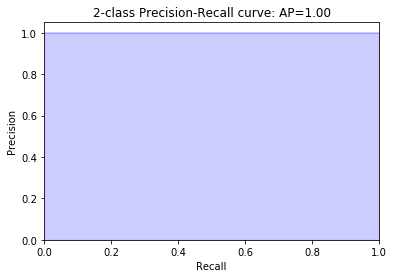

In [24]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [26]:
#ROC Curve (all our samples are balanced)
auc = roc_auc_score(y_true, y_score)
print('AUC: %.3f' % auc)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.